In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
file1 = pd.read_csv('complete_data_unscaled.csv')
file2 = pd.read_csv('complete_data.csv')

In [3]:
print(file1.head(5))

         town flat_type      flat_model  month_count  floor_area_sqm  storey  \
0     hougang    4_room  new_generation            0            93.0       8   
1  queenstown    3_room        standard            0            66.0       5   
2  queenstown    3_room        standard            0            52.0       5   
3  queenstown    3_room        standard            0            56.0       2   
4  queenstown    4_room        improved            0            82.0      14   

   remaining_lease  dist_phpcs  dist_schools  dist_supermarkets  \
0               85       0.336         0.506              0.582   
1               71       0.297         0.340              0.528   
2               73       0.154         0.074              0.338   
3               73       0.170         0.214              0.402   
4               77       0.108         0.759              0.105   

   dist_hawkercentres  dist_mrtlrt  dist_city  int_rate  resale_price  
0               0.847        4.489     10.02

In [4]:
print(file2.head(5))

         town flat_type      flat_model  month_count  floor_area_sqm  storey  \
0     hougang    4_room  new_generation          0.0        0.241636  0.1250   
1  queenstown    3_room        standard          0.0        0.141264  0.0625   
2  queenstown    3_room        standard          0.0        0.089219  0.0625   
3  queenstown    3_room        standard          0.0        0.104089  0.0000   
4  queenstown    4_room        improved          0.0        0.200743  0.2500   

   remaining_lease  dist_phpcs  dist_schools  dist_supermarkets  \
0         0.724138    0.122762      0.091766           0.175354   
1         0.482759    0.108513      0.061661           0.159084   
2         0.517241    0.056266      0.013420           0.101838   
3         0.517241    0.062112      0.038810           0.121121   
4         0.586207    0.039459      0.137650           0.031636   

   dist_hawkercentres  dist_mrtlrt  dist_city  int_rate  resale_price  
0            0.127374     0.606052   0.41599

In [5]:
print(file1['town'].unique())
print(len(file1['town'].unique()))

['hougang' 'queenstown' 'serangoon' 'sembawang' 'sengkang' 'pasir_ris'
 'tampines' 'kallang/whampoa' 'marine_parade' 'jurong_west' 'woodlands'
 'yishun' 'toa_payoh' 'bukit_batok' 'bishan' 'bedok' 'bukit_merah'
 'bukit_panjang' 'ang_mo_kio' 'jurong_east' 'geylang' 'choa_chu_kang'
 'central_area' 'bukit_timah' 'clementi' 'punggol']
26


In [6]:
print(file1['flat_type'].unique())
print(len(file1['flat_type'].unique()))

['4_room' '3_room' '5_room' 'executive' '2_room' '1_room'
 'multi_generation']
7


In [7]:
print(file1['flat_model'].unique())
print(len(file1['flat_model'].unique()))

['new_generation' 'standard' 'improved' 'model_a' 'maisonette'
 'simplified' 'apartment' 'terrace' 'model_a-maisonette'
 'improved-maisonette' 'multi_generation' '2-room' 'adjoined_flat'
 'premium_apartment' 'premium_maisonette' 'model_a2' 'dbss' 'type_s1'
 'type_s2' 'premium_apartment_loft' '3gen']
21


In [8]:
# data1 will be used to save unscaled dataset
# data2 will be used to save scaled dataset

data1  = pd.concat([file1.iloc[:, 3:-1], pd.get_dummies(file1.iloc[:, 0:3], drop_first = True), file1.iloc[:, -1]], axis = 1)
data2  = pd.concat([file2.iloc[:, 3:-1], pd.get_dummies(file2.iloc[:, 0:3], drop_first = True), file2.iloc[:, -1]], axis = 1)

In [9]:
data1.head(10)

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,resale_price
0,0,93.0,8,85,0.336,0.506,0.582,0.847,4.489,10.024,...,1,0,0,0,0,0,0,0,0,227000.0
1,0,66.0,5,71,0.297,0.340,0.528,0.272,0.579,6.096,...,0,0,0,0,0,1,0,0,0,131000.0
2,0,52.0,5,73,0.154,0.074,0.338,0.182,0.376,6.023,...,0,0,0,0,0,1,0,0,0,122000.0
3,0,56.0,2,73,0.170,0.214,0.402,0.159,0.450,6.091,...,0,0,0,0,0,1,0,0,0,128000.0
4,0,82.0,14,77,0.108,0.759,0.105,0.207,0.295,7.540,...,0,0,0,0,0,0,0,0,0,290000.0
5,0,89.0,2,73,0.343,0.638,0.491,0.333,0.675,5.824,...,0,0,0,0,0,0,0,0,0,233000.0
6,0,86.0,11,74,0.748,0.504,0.353,0.908,1.305,8.545,...,0,0,0,0,0,0,0,0,0,275000.0
7,0,88.0,14,74,0.170,1.212,0.282,0.242,0.792,7.113,...,0,0,0,0,0,0,0,0,0,296000.0
8,0,88.0,8,75,0.173,1.176,0.162,0.177,0.470,6.957,...,0,0,0,0,0,0,0,0,0,318000.0
9,0,88.0,5,75,0.181,1.113,0.068,0.134,0.399,7.050,...,0,0,0,0,0,0,0,0,0,305000.0


In [10]:
data2.head(10)

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,resale_price
0,0.0,0.241636,0.1250,0.724138,0.122762,0.091766,0.175354,0.127374,0.606052,0.415998,...,1,0,0,0,0,0,0,0,0,227000.0
1,0.0,0.141264,0.0625,0.482759,0.108513,0.061661,0.159084,0.040699,0.075451,0.242882,...,0,0,0,0,0,1,0,0,0,131000.0
2,0.0,0.089219,0.0625,0.517241,0.056266,0.013420,0.101838,0.027133,0.047903,0.239665,...,0,0,0,0,0,1,0,0,0,122000.0
3,0.0,0.104089,0.0000,0.517241,0.062112,0.038810,0.121121,0.023666,0.057945,0.242662,...,0,0,0,0,0,1,0,0,0,128000.0
4,0.0,0.200743,0.2500,0.586207,0.039459,0.137650,0.031636,0.030901,0.036911,0.306523,...,0,0,0,0,0,0,0,0,0,290000.0
5,0.0,0.226766,0.0000,0.517241,0.125320,0.115705,0.147936,0.049894,0.088479,0.230895,...,0,0,0,0,0,0,0,0,0,233000.0
6,0.0,0.215613,0.1875,0.534483,0.273292,0.091404,0.106357,0.136569,0.173972,0.350815,...,0,0,0,0,0,0,0,0,0,275000.0
7,0.0,0.223048,0.2500,0.534483,0.062112,0.219804,0.084965,0.036177,0.104356,0.287704,...,0,0,0,0,0,0,0,0,0,296000.0
8,0.0,0.223048,0.1250,0.551724,0.063208,0.213275,0.048810,0.026379,0.060660,0.280829,...,0,0,0,0,0,0,0,0,0,318000.0
9,0.0,0.223048,0.0625,0.551724,0.066131,0.201850,0.020488,0.019897,0.051025,0.284927,...,0,0,0,0,0,0,0,0,0,305000.0


**Scaled Dataset**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 0:-1], data2.iloc[:, -1], test_size = 0.2, random_state = 2023)

In [12]:
RFRegr = RandomForestRegressor(random_state = 2023)
RFRegr.fit(X_train, y_train)

RandomForestRegressor(random_state=2023)

In [16]:
print('R^2 score for training dataset:', RFRegr.score(X_train, y_train))
print('R^2 score for testing dataset:', RFRegr.score(X_test, y_test))

R^2 score for training dataset: 0.9974090036396941
R^2 score for testing dataset: 0.9819918498567398


In [19]:
print('RMSE for training dataset:', metrics.mean_squared_error(y_train, RFRegr.predict(X_train)) **0.5)
print('RMSE for testing dataset:', metrics.mean_squared_error(y_test, RFRegr.predict(X_test)) **0.5)

RMSE for training dataset: 8068.035842373635
RMSE for testing dataset: 21233.01239298703


In [20]:
R2_scaled, RMSE_scaled = [], []
for i in X_test['month_count'].unique():
    R2_scaled += [ metrics.r2_score(y_test[X_test[X_test['month_count'] == i].index], RFRegr.predict(X_test[X_test['month_count'] == i])) ]
    RMSE_scaled += [ metrics.mean_squared_error(y_test[X_test[X_test['month_count'] == i].index], RFRegr.predict(X_test[X_test['month_count'] == i])) **0.5 ]
print('R^2 score for whole testing dataset:', R2_scaled[-1])
print('R^2 score for first month in testing dataset:', R2_scaled[0])

R^2 score for whole testing dataset: 0.971921524833965
R^2 score for first month in testing dataset: 0.9761016305337733


In [21]:
print('Number of months where R^2 is higher than 0.9:', len([i for i in R2_scaled if i > 0.9]))

Number of months where R^2 is higher than 0.9: 277


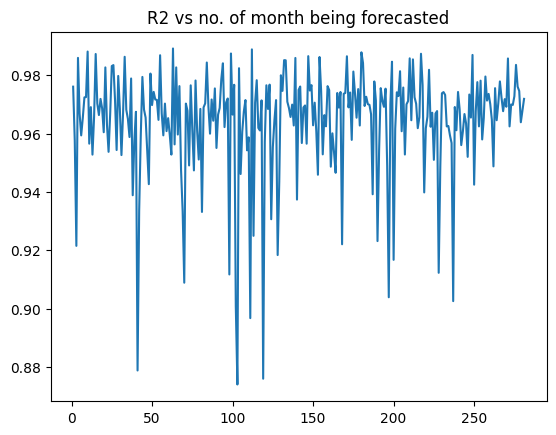

In [22]:
plt.plot(range(1, len(R2_scaled)+1), R2_scaled)
plt.title('R2 vs no. of month being forecasted')
plt.show()

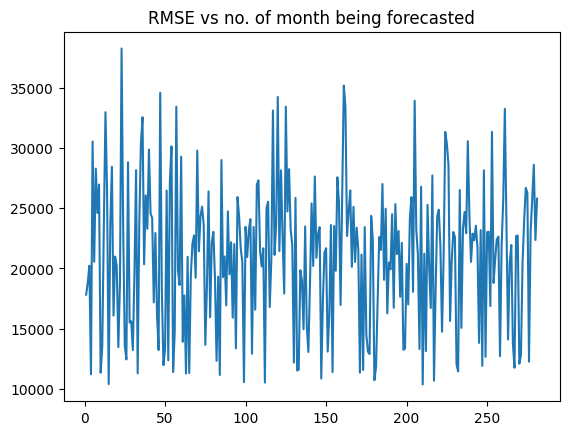

In [23]:
plt.plot(range(1, len(RMSE_scaled)+1), RMSE_scaled)
plt.title('RMSE vs no. of month being forecasted')
plt.show()